# TopoFlow Calibration for Baro River at Masha
## (GLDAS Rainfall, Bilinear, 2015-10 to 2018-10)

#### Table of Contents

1.  <a href="#intro_J3">Introduction</a> <br>
2.  <a href="#install_J3">How to Install the TopoFlow Python Package</a> <br>
3.  <a href="#baro_J3">Baro River Basin, Gambella, Ethiopia</a> <br>
4.  <a href="#rain_movie_J3">GLDAS Rainfall Movie: 2015-10 to 2018-10</a> <br>
5.  <a href="#gauge_data_J3">River Discharge Data for Baro River at Masha</a> <br>
6.  <a href="#test_run_J3">Run TopoFlow with Best-Guess Parameters</a> <br>
7.  <a href="#cal_module_J3">Instantiate the TopoFlow Calibrate Module</a> <br>
8.  <a href="#calibrate_J3">TopoFlow Calibration for Baro River at Masha</a> <br>
9.  <a href="#conclusions_J3">Conclusions </a> <br> 
10. <a href="#setup_J3">Appendix 1: Installing TopoFlow in a conda Environment</a>

<!-- Hyperlink IDs must be unique to work in Jupyter Lab when
there are multiple notebooks open. Hence the trailing letter. -->

## Introduction  <a id="intro_J"></a>

This notebook shows a simple model calibration exercise for the TopoFlow 3.6 hydrologic model that uses river discharge measurements from a gauging station on the Baro River, near Masha in Ethiopia.
For this exercise, only a few of the model parameters will be adjusted, and just one at a time.
As explained in previous notebooks, model calibration is computationally expensive and is best performed on supercomputers with specialized toolkits such as [<b>DAKOTA</b>](https://dakota.sandia.gov/) from DOE's Sandia Labs.

This notebook is based on the methodology described in a companion notebook called:
[<b>TopoFlow_Calibration_Gauge_Data.ipynb</b>](https://github.com/peckhams/topoflow36/blob/master/notebooks/TopoFlow_Calibration_Gauge_Data.ipynb).
Please see that notebook for background information.

This notebook uses a gridded, space-time rainfall product called <b>GLDAS</b> resampled to the model's grid using bilinear interpolation.  This GLDAS data has a rainfall grid for every 3-hour interval.  The model will be run for the time period:  2015-10 to 2018-10.

For the model runs in this notebook, infiltration is turned off and Priestley-Taylor evaporation is used with a fixed temperature value.


## How to Install the TopoFlow Python Package  <a id="install_J3"></a>

Before you can run the code in this notebook, you will need to install the TopoFlow 3.6 Python package.

Detailed instructions and background information for how to install TopoFlow in a conda environment are given in
<a href="#setup_J3"><b>Appendix 1:  Installing TopoFlow in a conda Environment</b></a>.

## Baro River Basin, Masha, Ethiopia  <a id="baro_J3"></a>

The 
[<b>Baro River</b>](https://en.wikipedia.org/wiki/Baro_River)
is a large tributary of the
[<b>Sobat River</b>](https://en.wikipedia.org/wiki/Sobat_River)
that flows westward from the
[<b>Ethiopian Highlands</b>](https://en.wikipedia.org/wiki/Ethiopian_Highlands)
and lies partly within both the
[<b>Oromia</b>](https://en.wikipedia.org/wiki/Oromia_Region)
and
[<b>Gambela</b>](https://en.wikipedia.org/wiki/Gambela_Region)
regions.  It is about 150 meters wide as it passes through the
[<b>town of Gambela</b>](https://en.wikipedia.org/wiki/Gambela,_Ethiopia),
and drains a contributing area of over 41,000 square kilometers.

<table> <tr>
  <td> <img src="https://github.com/peckhams/topoflow36/blob/master/images/Baro-Gam_12sec_relief_boundary_rivers1.png?raw=True" width="70%">
</tr> </table>

<b>Figure.</b> A color, shaded-relief image of the Baro River basin, in Ethiopia, where red is high elevation and blue is lower elevation.  Black lines show the river network and the white polygon is the watershed boundary.

## GLDAS Rainfall Movie:  2015-10 to 2018-10  <a id="rain_movie_J3"></a>

## River Discharge Data for Baro River, Near Masha  <a id="gauge_data_J3"></a>

For this calibration exercise, we will use observed, daily river discharge measurements at the mouth of a relatively small subbasin within the Baro River basin, with its outlet near the town of Masha.


## Run TopoFlow Once with Best-Guess Parameters  <a id="test_run_J3"></a>

Before starting the calibration exercise, which requires multiple model runs, each taking about 15 minutes on my new MacBook Pro, we perform a run with some "best-guess" parameters to get an idea of what to expect.  First, we import some Python packages and set some directories and file prefixes.

In [1]:
from topoflow import main
from topoflow.utils import visualize as tfvis
import os, os.path

cfg_prefix  = 'Test1'
case_prefix = 'Test1'
home_dir    = os.path.expanduser("~") + os.sep
basin_dir   = home_dir + 'TF_Tests3/Baro-Gam_60sec/'

cfg_dir     = basin_dir + 'Test1_2015-10_to_2018-10_GLDAS_Bilinear_cfg/'
output_dir  = basin_dir + 'Test1_2015-10_to_2018-10_GLDAS_Bilinear_OUT/'

print('Your Home directory =', home_dir)
print('Basin directory     =', basin_dir)
print('CFG directory =', cfg_dir)
print('Output directory =', output_dir)

time_interp_method = 'None'
# time_interp_method = 'Linear'

Importing TopoFlow 3.6 package modules:
   topoflow.utils
   topoflow.utils.tests
   topoflow.components
   topoflow.components.tests
   topoflow.framework
   topoflow.framework.tests
 
Your Home directory = /Users/peckhams/
Basin directory     = /Users/peckhams/TF_Tests3/Baro-Gam_60sec/
CFG directory = /Users/peckhams/TF_Tests3/Baro-Gam_60sec/Test1_2015-10_to_2018-10_GLDAS_Bilinear_cfg/
Output directory = /Users/peckhams/TF_Tests3/Baro-Gam_60sec/Test1_2015-10_to_2018-10_GLDAS_Bilinear_OUT/


In [3]:
main.run_model(cfg_prefix=cfg_prefix, cfg_directory=cfg_dir,
               time_interp_method=time_interp_method)

EMELI: Reading info from provider_file:
    /Users/peckhams/TF_Tests3/Baro-Gam_60sec/Test1_2015-10_to_2018-10_GLDAS_Bilinear_cfg/Test1_providers.txt
EMELI: Reading info from comp_repo_file:
    /Users/peckhams/Dropbox/TopoFlow_3.6/topoflow/framework/component_repository.xml

EMELI: Instantiated component: tf_meteorology
EMELI: Instantiated component: tf_diversions_fraction_method
EMELI: Instantiated component: tf_channels_kin_wave
EMELI: Instantiated component: tf_snow_degree_day
EMELI: Instantiated component: tf_satzone_darcy_layers
EMELI: Instantiated component: tf_evap_priestley_taylor
EMELI: Instantiated component: tf_infil_richards_1d
EMELI: Instantiated component: tf_ice_gc2d
EMELI: Instantiated component: topoflow_driver
Driver component name = topoflow_driver
 
Meteorology component: Initializing...
Reading config file into component state.
In met_base read_input_files():
   time = 0.0
   min(P) = 0.0 [mmph]
   max(P) = 0.1836901319052231 [mmph]
 
Imported netCDF4 version: 1.5.

### Display the Simulated Hydrograph (River Discharge)

The next figure shows a simulatd time series for <b>river discharge</b> for the Baro River at Masha.
Recall that the CHIRPS rainfall product was used.

<b>Note:</b> var_index=2 specifies the grid cell on the Baro River that is closest to the town of Masha.  This grid cell is in row 98, column 75.


var_names in netCDF file =
['time', 'Q_79_4', 'Q_98_75', 'Q_76_14', 'Q_79_29', 'Q_59_48', 'Q_60_48', 'Q_76_45', 'Q_74_44', 'Q_81_56']
var longitudes =
[34.296249999999006, 35.479583333332336, 34.46291666666567, 34.71291666666567, 35.02958333333233, 35.02958333333233, 34.979583333332336, 34.96291666666567, 35.16291666666567]
var latitudes =
[8.178749999998999, 7.862083333332333, 8.228749999999, 8.178749999998999, 8.512083333332333, 8.495416666665665, 8.228749999999, 8.262083333332333, 8.145416666665666]



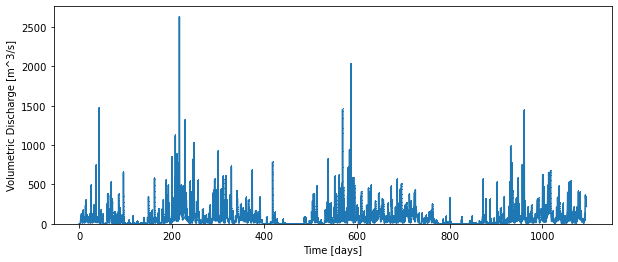

In [4]:
os.chdir(output_dir)
nc_file = case_prefix + '_0D-Q.nc'
tfvis.plot_time_series(nc_file, output_dir=output_dir, var_index=2,
                       marker=',', REPORT=True, xsize=10, ysize=4)

### Display the Simulated River Depth

The bankfull depth of the Baro River near Masha is estimated to be about ##### meters based on an online literature search (but we were unable to obtain actual measurements).  The next figure shows a time series of <b>simulated river depth</b> for the Baro River at Masha.

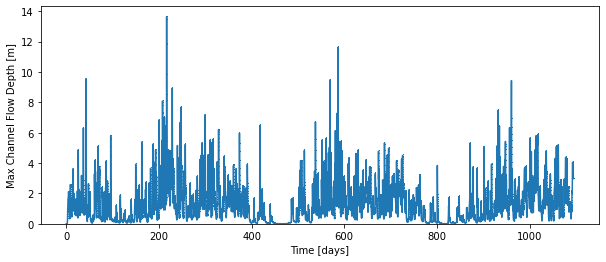

In [5]:
os.chdir(output_dir)
nc_file = case_prefix + '_0D-d.nc'
tfvis.plot_time_series(nc_file, output_dir=output_dir, var_index=2,
                       marker=',', REPORT=False, xsize=10, ysize=4)

### Display the Simulated River Velocity

The next figure shows a time series of <b>simulated river velocity</b> for the Baro River near Masha, with an average value of about 0.15 meters per second.

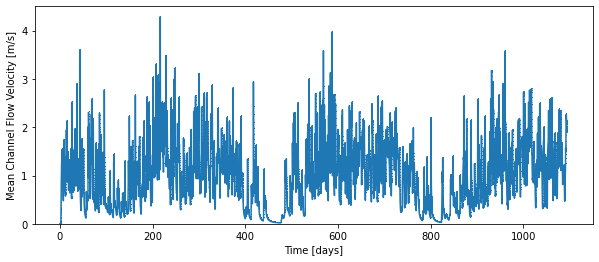

In [6]:
os.chdir(output_dir)
nc_file = case_prefix + '_0D-u.nc'
tfvis.plot_time_series(nc_file, output_dir=output_dir, var_index=2,
                       marker=',', REPORT=False, xsize=10, ysize=4)

## Instantiate the TopoFlow Calibrate Module  <a id="cal_module_J3"></a>

Having completed one model run, we now import TopoFlow's <b>calibrate</b> module from <b>topoflow/utils</b> and review some of its features.
This module reads required information about the observed and predicted time series from a configuration (CFG) file called <b>calibrate.cfg</b>.  Note that simulated values from TopoFlow will be stored with a fixed time interval between values (i.e. regular spacing in time), but the observed values are often stored with an irregular time interval.  Because of this observed values often need to be <b>regularized</b>, or interpolated to the same times associated with the simulated values before computing the cost function.  Also, observed times (and sometimes dates), may use different formats such as "hhmm", "datetime" (e.g. 2015-10-01 12:34:56), or "timesince".  The <b>calibrate</b> module automatically deals with all of these issues.

The <b>calibrate</b> module contains a class called <b>calibrator</b>.  We first create an instance of this class, call some of its <b>method functions</b>, and show how to print out some of the data it contains.

### Import and Instantiate the Module


In [19]:
from topoflow.utils import calibrate

#---------------------------------------------
# Create an instance of the calibrator class
#---------------------------------------------
cal_cfg_file  = basin_dir + 'Test1_2015-10_to_2018-10_GLDAS_Bilinear_cfg/calibrate.cfg'
cal = calibrate.calibrator(cfg_file=cal_cfg_file)

### Call Some of Its Method Functions

Notice that <b>sim_value_column = 2</b>, which again corresponds to the DEM grid cell closest to the town of Masha on the Baro River.

In [20]:
cal.print_cfg_info()

In print_cfg_info():
site_prefix  = Baro-Gam_60sec
cfg_prefix   = Test1
home_dir     = /Users/peckhams/
basin_dir    = /Users/peckhams/TF_Tests3/Baro-Gam_60sec/
topo_dir     = /Users/peckhams/TF_Tests3/Baro-Gam_60sec/__topo/
cfg_dir      = /Users/peckhams/TF_Tests3/Baro-Gam_60sec/Test1_2015-10_to_2018-10_CHIRPS_Bilinear_cfg/
output_dir   = /Users/peckhams/TF_Tests3/Baro-Gam_60sec/Test1_2015-10_to_2018-10_CHIRPS_Bilinear_OUT/
------------------------------------------------------
obs_dir            = /Users/peckhams/TF_Tests3/Baro-Gam_60sec/__observations/
obs_data_file      = /Users/peckhams/TF_Tests3/Baro-Gam_60sec/__observations/Baro-Masha_Discharge_2015-10_to_2018-10.csv
obs_data_delim     = ,
obs_time_format    = date
obs_time_interval  = 1440.0
obs_time_units     = minutes
obs_start_datetime = 2015-10-01 00:00:00
obs_header_lines   = 4
obs_time_column    = 0
obs_value_column   = 1
obs_interp_method  = linear
------------------------------------------------------
sim_dir           

In [21]:
#-------------------------------------------
# Read simulated values from the last run,
# and then read observed values
#-------------------------------------------
cal.get_simulated_values( SILENT=False )
cal.get_observed_values( SILENT=False )

In get_simulated_values():
Sim time format    = timesince
Sim time interval  = 60.0
Min(sim_times)     = 0.0
Max(sim_times)     = 1576740.0
Min(sim_values)    = 0.0
Max(sim_values)    = 1055.4833

Reading time series data...
Interpolating obs. time series data...

In get_observed_values():
Obs time format    = date
Obs time interval  = 1440.0
obs_values.size    = 26280
Min(obs_values)    = 1.0809999704360962
Max(obs_values)    = 163.85499572753906

obs_values_orig.size = 1096
Min(obs_values_orig) = 1.081
Max(obs_values_orig) = 163.855


### Print Values of Some of its Variables

In [23]:
print(cal.sim_start_datetime)
print(cal.sim_time_units)
print(cal.sim_time_format)
print(cal.sim_times[0:5])
print(cal.sim_times.max())
print(cal.sim_times.size)
print()
print(cal.obs_start_datetime)
print(cal.obs_time_units)
print(cal.obs_time_format)
print(cal.obs_times[0:10])
print(cal.obs_times[-10:])
print(cal.obs_times.size)

2015-10-01T00:00:00
minutes
timesince
[  0.  60. 120. 180. 240.]
1576740.0
26280

2015-10-01 00:00:00
minutes
date
[  0.  60. 120. 180. 240. 300. 360. 420. 480. 540.]
[1576200. 1576260. 1576320. 1576380. 1576440. 1576500. 1576560. 1576620.
 1576680. 1576740.]
26280


### Compute the Cost Function for One Model Run

In [24]:
Y_obs = cal.obs_values
Y_sim = cal.sim_values
n_obs = Y_obs.size   #  ndarrays
n_sim = Y_sim.size
if (n_obs < n_sim):
    Y_sim = Y_sim[0:n_obs]
else:
    Y_obs = Y_obs[0:n_sim]
cost = calibrate.Lp_norm(Y_obs, Y_sim) 
print( cost )

12686.766279119403


### Plot the Observed and Simulated Values with Options

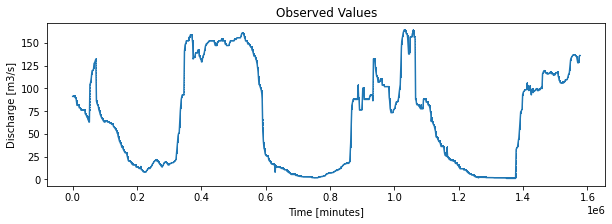

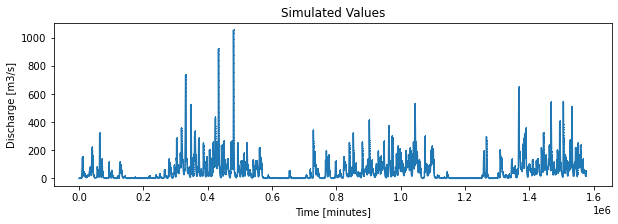

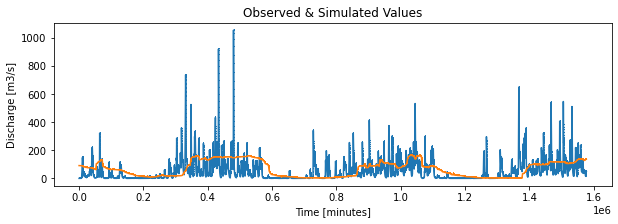

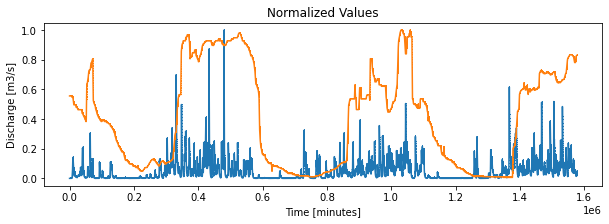

In [25]:
cal.plot_time_series(obs_only=True, marker=',', title='Observed Values')
cal.plot_time_series(sim_only=True, marker=',', title='Simulated Values')
cal.plot_time_series(marker=',', title='Observed & Simulated Values')
cal.plot_time_series(normalize=True, marker=',', title='Normalized Values')

## TopoFlow Calibration for Baro River at Masha  <a id="calibrate_J3"></a>

Again, we will assume that you have already worked through the Jupyter notebook called:
[<b>TopoFlow_Calibration_Gauge_Data.ipynb</b>](https://github.com/peckhams/topoflow36/blob/master/notebooks/TopoFlow_Calibration_Gauge_Data.ipynb)
so we will not repeat the background information given there.
We will simply use the same set of calibration parameters that were used in that notebook.

### Case 1:  Calibration Variable = "manning_n_min"

Working...
   param = 0.02
   cost  = 12686.766279119403
   run_time = 20.31887751420339 [minutes]


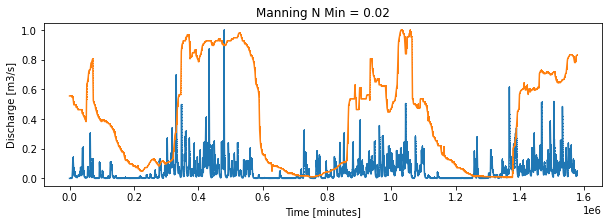

   param = 0.029333334


In [ ]:
cal.calibrate( cal_var='manning_n_min', var_range=[0.02, 0.16], n_values=16,
               manning_n_max=0.3, PLOT=True, SILENT=True,
               NORMALIZE_PLOT=True)

### Print out the parameter values and their associated costs

For the case where the adjustable parameter is <b>manning_n_min</b>, a value of about <b>####</b> minimizes the cost function. 

Note that the
[<b>Manning's n roughness parameter</b>](https://en.wikipedia.org/wiki/Manning_formula)
decreases downstream (as total contributing area, or TCA increases), and a typical value for a river channel is around 0.02 or 0.03.  Manning's formula is often used for overland flow as well, where the roughness and momentum loss is much greater.  Some typical overland flow values are:<br>
(0.04: grass meadow, 0.08: harvested corn, 0.16: corn field, 0.32: forest, 0.64: dense forest).
See: http://cidbimena.desastres.hn/pdf/eng/doc5646/doc5646-8b.pdf (Table 8.5).

<!--
<table>
<tr> <td>0.04</td> <td>grass meadow</td> </tr>
<tr> <td>0.08</td> <td>harvested corn</td> </tr>
<tr> <td>0.16</td> <td>corn field</td> </tr>
<tr> <td>0.32</td> <td>forest</td> </tr>
<tr> <td>0.64</td> <td>dense forest</td> </tr>
</table>
-->

In [ ]:
print('best param =', cal.best_param)
print('params =', cal.params)
print('costs  =', cal.costs)

### Case 2:  Calibration Variable = "channel_width_max"

For this next set of simulations, we vary the maximum channel width, i.e. the maximum river width of any channel in the Baro River, which should occur near the basin outlet, just west of the town of Gambela. 

In [ ]:
cal.calibrate( cal_var='channel_width_max', var_range=[100.0, 400.0], n_values=10,
               channel_width_power=0.5, PLOT=True, SILENT=True,
               NORMALIZE_PLOT=False)

In [ ]:
print('best param =', cal.best_param)
print('params =', cal.params)
print('costs  =', cal.costs)

### Case 3:  Calibration Variable = "channel_width_power"

For this next set of simulations, we vary exponent (power) that is used in the empirical formula that is used to compute channel width from total contributing area.

In [ ]:
cal.calibrate( cal_var='channel_width_power', var_range=[0.1, 1.0], n_values=10,
               channel_width_max=150.0, PLOT=True, SILENT=True,
               NORMALIZE_PLOT=False, 

In [ ]:
print('best param =', cal.best_param)
print('params =', cal.params)
print('costs  =', cal.costs)

## Conclusions   <a id="conclusions_J3"></a>

The purpose of this notebook was to illustrate the basic concepts of how to calibrate the TopoFlow hydrologic model by varying only one parameter at a time and then showing the observed and predicted hydrographs as plots, along with the associated value of the cost function.  The TopoFlow utilities <b>calibrate.py</b>, <b>parameterize.py</b> and <b>visualize.py</b> in topoflow/utils do the work.

In this notebook, four input parameters were varied, which are used to create two of the input files for TopoFlow.
These, along with their least-cost values when varied individually, were: <br> <br>
&nbsp; &nbsp; <b>manning_n_min</b> = ####  <br>
&nbsp; &nbsp; <b>manning_n_max</b> = #### <br>
&nbsp; &nbsp; <b>channel_width_power</b> = #### , and<br>
&nbsp; &nbsp; <b>channel_width_max</b> = #### (meters). <br> <br>
All of these values are close to what was expected based on the expert guesses we used at the beginning.

A future companion to this notebook will vary multiple parameters simultaneously.
As explained in the Introduction, these are only a few of the many input parameters that could be varied
and a full-fledged calibration exercise would be better done using the DAKOTA package.


## Appendix 1: Installing TopoFlow in a conda Environment  <a id="setup_J3"></a>

To run this Jupyter notebook, it is recommended to use Python 3.7 from an Anaconda distribution and to install the required Python packages in a conda environment called <b>tf36</b>.  This prevents conflicts with other Python packages you may have installed.
The Anaconda distribution includes many packages from the
[<b>Python Standard Library</b>](https://docs.python.org/3/library/).

First, download the TopoFlow 3.6 package from GitHub repo "topoflow36" at:
<b>https://github.com/peckhams/topoflow36</b>.
Copy or unzip the package into some directory on your computer.  Let's refer to this full path as TF36_DIR.  e.g. TF36_DIR = /Users/peckhams/Dropbox/TopoFlow_3.6

Installing TopoFlow 3.6 with pip causes most of its dependencies to be installed automatically.  However, if you want to run the growing collection of Jupyter notebooks (such as this one) that highlight TopoFlow functionality, you will also need to install the
[<b>nb_conda</b>](https://docs.anaconda.com/anaconda/user-guide/tasks/use-jupyter-notebook-extensions/) package, and optionally the <b>jupyterlab</b> package (see below).
In addition, some of the new TopoFlow utilities (e.g. regrid.py and visualize.py) require the
[<b>gdal</b>](https://pypi.org/project/GDAL/) and
[<b>matplotlib</b>](https://matplotlib.org/) packages.
Simply type the following commands at an OS prompt after installing Anaconda and downloading TopoFlow.

``` bash
% conda update -n base conda
% conda create --name tf36
% conda activate tf36
% conda list
% conda install nb_conda
% conda install gdal
% conda install matplotlib
% conda install imageio
% pip install imageio-ffmpeg  (an imageio extension)
% cd TF36_DIR
% pip install -e .   (-e is the editable/developer option)
```

<b>Note:</b>  The <b>pip</b> package manager is used to install TopoFlow 3.6, since it is not available as a conda package.  (It gets installed when you install <b>nb_conda</b>.) However, like conda, pip will install a package and its dependencies into the currently active conda environment, as explained
[<b>in these docs</b>](https://docs.conda.io/projects/conda/en/4.6.1/user-guide/tasks/manage-pkgs.html#installing-non-conda-packages).  If you switch to another environment with <b>conda activate envname</b>, you can confirm that topoflow (or cfunits, gdal, netcdf4, etc.) is not there with <b>conda list</b>. 

<b>Note:</b>  Some of the new TopoFlow utilities use a Python package version of [<b>GDAL</b>](https://pypi.org/project/GDAL/).  At the time of this writing, installing <b>gdal</b> from the <b>conda-forge </b> with <i>conda install -c conda-forge gdal</i> did not work.

<b>Note:</b> The netCDF4 package will be installed as a TopoFlow dependency.

#### <b>Conda Environments</b>

Note that <b>conda</b> is the name of the package manager for the popular Anaconda Python distribution.  One feature of conda is support for multiple environments, which are isolated from one another.  When you install Anaconda, an environment called <b>base</b> is created for you and a base set of commonly-used Python packages are installed there.  However, you can (and should!) create additional, named environments and install different sets of Python packages into them without worrying about potential conflicts with packages in other environments.  Type <b>conda env list</b> to list your available environments.  You can switch to one of your other environments using the command <b>conda activate envname</b>.  (Replace "envname" with the name of an environment.) You can switch back to the base environment with the command <b>conda deactivate</b>.  It is better not to install new packages into the base environment.  See the online conda documentation on [<b>Managing Environments</b>](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) for more information.

It is always a good idea to update conda itself before creating new environments and installing packages in them. The "-n" flag is followed by the name of the environment to update, and the "-c" flag is followed by the name of the <b>channel</b> from which to get packages.  A channel is a collection of Python packages that are provided and maintained by some group.  The word "defaults" refers to
[<b>Anaconda's own collection</b>](https://docs.anaconda.com/anaconda/packages/pkg-docs/), while
[<b>conda-forge</b>](https://conda-forge.org/feedstocks/)
refers to another popular collection and the GitHub organization that maintains it.  Many Python packages are available from both of these channels.  (However, the ipyleaflet and pydap  packages are currently not available in the Anaconda collection.) When you are installing several packages into an environment, the potential for installation problems seems to be less if you get them all from the same channel.  Keep in mind that packages you install will likely depend on many other Python packages, so there is a potential for conflicts, usually related to different package versions.  Using conda environments helps to mitigate against this and helps with <b>reproducibility</b>.

Once you've switched to an environment with <b>conda activate envname</b>, you can type <b>conda list</b> to see a list of packages.  If you do this right after you create a new environment you will see that it contains no packages.  If you do this right after installing each package above you will see that:

<ul>
    <li>Installing <b>nb_conda</b> triggers installation of <b>nb_conda_kernels</b> (2.2.3),
        <b>ipykernel</b> (5.3.0), <b>notebook</b> (6.0.3), <b>pip</b> (20.0.2),
        <b>setuptools</b> (46.4.0) and <b>traitlets</b> (4.3.3), among many others. 
    <li>Installing <b>gdal</b> triggers installation of #######.
    <li>Installing <b>matplotlib</b> triggers installation of ##########. 
</ul>

#### <b>Jupyter Notebook Extensions</b>

Note that <b>nb_conda</b> is installed first above, and triggers installation of <b>nb_conda_kernels</b> along with <b>notebook</b>.  This is important as it makes your Jupyter notebook app aware of your conda environments and available in the app as "kernels".  Anaconda provides a helpful page on the
[<b>Jupyter Notebook Extensions</b>](https://docs.continuum.io/anaconda/user-guide/tasks/use-jupyter-notebook-extensions/).
That page also explains how you can enable or disable these extensions individually. The command <b>jupyter nbextension list</b> shows you the extensions that are installed and whether they are enabled.  If you run the <b>jupyter notebook</b> or <b>jupyter lab</b> command in an environment that has <b>nb_conda_kernels</b> installed (see below), you will have the ability to associate one of your available conda environments with any new notebook you create.  Different environments give rise to different <b>kernels</b> in Jupyter, and the kernel name includes the environment name, e.g. <b>Python \[conda env:tf36\]</b>.  The kernel name is displayed in the upper right corner.  Notebooks typically open with the "environment kernel" they were created with. However, there is a <b>Change Kernel</b> option in the <b>Kernel</b> menu in the Jupyter app menu bar. (After changing the kernel, you may need to choose <b>Restart</b> from the <b>Kernel</b> menu.

#### <b>Cloning a conda Environment</b>

If your notebook is working but then you want to import additional packages (possibly with many dependencies, and potential for problems), you can keep the first environment but clone it with
<b><i>conda create --name clonename --copy --clone envname</i></b>,
and then install the additional packages in the clone.  This way, you can switch to the new environment's kernel and try to run your notebook, but if you run into any problems you can easily revert back to the original environment and functionality.

<b>Note:</b> Setting the "--copy" flag installs all packages using copies instead of hard or soft links.  This is necessary to avoid problems when using <b>pip</b> together with <b>conda</b> as described [<b>on this page</b>](https://stackoverflow.com/questions/43879119/installing-tensorflow-in-cloned-conda-environment-breaks-conda-environment-it-wa).

#### <b>Running Notebooks in the Jupyter Notebook App</b>

When you want to run the notebook, type <b>conda activate tf36</b> (at an OS command prompt) to activate this environment.  Then change to the directory that contains this notebook and type <b>jupyter notebook</b>.  By default, this folder is called <b>Jupyter</b> and is in your home directory.  In the app, choose this notebook by name, "TopoFlow_Getting_Started.ipynb", and make sure to choose the kernel called:  <b>Python \[conda env:tf36\]</b>.  See the References section at the end for more info.

#### <b>Running Notebooks in the JupyterLab App</b>

The
[<b>JupyterLab</b>](https://jupyterlab.readthedocs.io/en/stable/index.html)
app is a cool, new successor to the Notebook app and offers many additional features.  If you want to use this notebook in JupyterLab, you need to install one more Python package, as follows.

``` bash
% conda activate tf36
% conda install jupyterlab
```

You launch the JupyterLab app by typing <b>jupyter lab</b> instead of <b>jupyter notebook</b>.  To quit, choose <b>Logout</b> or <b>Shutdown</b> from the app's <b>File</b> menu.

#### <b>JupyterLab Extensions</b>

The Jupyter project provides documentation on
[<b>JupyterLab Extensions</b>](https://jupyterlab.readthedocs.io/en/stable/user/extensions.html)
which add capabilities to JupyterLab.  For example, after installing jupyterlab (see just above), if you want to use the <b>ipywidgets</b> and <b>ipyleaflet</b> Python packages, you need to install two extensions, as follows:
```
% conda activate tf36
% jupyter labextension install jupyter-leaflet
% jupyter labextension install @jupyter-widgets/jupyterlab-manager
```
To list the jupyter labextensions you have, and to see whether or not they are enabled, type <b>jupyter labextension list</b>.  <b>Note:</b> If you start jupyterlab from a conda environment in which a given extension is not installed, and then open or switch to a notebook which uses a different "environment kernel", one that requires that extension, the notebook may not work.

You should only install trusted extensions, due to security concerns, as explained in the documentation.  Third-party extensions pose a potential security risk.  An extension that allows you to play MP4 movie files in JupyterLab is
[<b>available on GitHub</b>](https://github.com/jupyterlab/jupyterlab-mp4)
(by Ian Rose of the JupyterLab organization)
and can be installed with the command:
```
% jupyter labextension install @jupyterlab/mp4-extension
```
<b>Note:</b> This command is from a pull-request on the extension's github repo.
Using the command: "jupyter labextension install jupyterlab-mp4" results in the
following error message:<br>
An error occured.
ValueError: "jupyterlab-mp4" is not a valid npm package

As of May 27, 2020, JupyterLab has added an experimental <b>Extension Manager</b> which can be enabled by choosing Settings > Enable Extension Manager in the app.
